In [57]:
path = "/Users/ragaai_user/Desktop/LabelQualityTest/dataset/bdd_val_1k.csv"
# path = "/Users/ragaai_user/Desktop/LabelQualityTest/dataset/bdd_val_1k_final.csv"
# path = "/Users/ragaai_user/Desktop/LabelQualityTest/dataset/bdd_val_1k_raga_score.csv"


import pandas as pd

In [58]:
df = pd.read_csv(path)
df.head()

,ImageId,FileName,ImageUri,SourceLink,AnnotationsV1,MistakeScore,ImageEmbedding,Weather,Scene,TimeOfDay,DetectionPredictionsDETR,DetectionPredictionsYOLO,LocalPath,AnnotationsV1_Noisy,MistakeScore_Noisy
0,0,b63b1c14-f01a2f6b,https://ragadev5prismstorage.blob.core.windows...,https://ragadev5prismstorage.blob.core.windows...,"{""annotations"": [{""Id"": ""1"", ""ClassId"": 0, ""Cl...","{'1': 0.3518804432475685, '2': 0.3627220987664...","[-0.015321795828640461, -0.09650221467018127, ...",overcast,residential,daytime,"{""annotations"": [{""Id"": ""1"", ""ClassId"": 0, ""Cl...","{""annotations"": [{""Id"": ""1"", ""ClassId"": 0, ""Cl...",/Users/ragaai_user/Desktop/Dataset/bdd_val_1k/...,"{""annotations"": [{""Id"": ""1"", ""ClassName"": ""car...","{'1': 0.35195591536309917, '2': 0.376516644556..."
1,1,b2b70230-bad4ff6e,https://ragadev5prismstorage.blob.core.windows...,https://ragadev5prismstorage.blob.core.windows...,"{""annotations"": [{""Id"": ""1"", ""ClassId"": 0, ""Cl...","{'1': 0.15813516470048886, '2': 0.334052755772...","[0.031369321048259735, -0.06893867999315262, 0...",partly cloudy,parking lot,daytime,"{""annotations"": [{""Id"": ""1"", ""ClassId"": 2, ""Cl...","{""annotations"": [{""Id"": ""1"", ""ClassId"": 0, ""Cl...",/Users/ragaai_user/Desktop/Dataset/bdd_val_1k/...,"{""annotations"": [{""Id"": ""1"", ""ClassName"": ""car...","{'1': 0.15736659262169764, '2': 0.340204550847..."
2,2,bd50478a-4eb79ba3,https://ragadev5prismstorage.blob.core.windows...,https://ragadev5prismstorage.blob.core.windows...,"{""annotations"": [{""Id"": ""1"", ""ClassId"": 0, ""Cl...","{'1': 0.22716917731783215, '2': 0.217505084127...","[0.04153875261545181, -0.0003907768987119198, ...",clear,city street,daytime,"{""annotations"": [{""Id"": ""1"", ""ClassId"": 6, ""Cl...","{""annotations"": [{""Id"": ""1"", ""ClassId"": 4, ""Cl...",/Users/ragaai_user/Desktop/Dataset/bdd_val_1k/...,"{""annotations"": [{""Id"": ""1"", ""ClassName"": ""car...","{'1': 0.2299251899428518, '2': 0.1695187810868..."
3,3,bc07d865-b2971089,https://ragadev5prismstorage.blob.core.windows...,https://ragadev5prismstorage.blob.core.windows...,"{""annotations"": [{""Id"": ""1"", ""ClassId"": 0, ""Cl...","{'1': 0.41479337787250764, '2': 0.543281222542...","[0.006251428741961718, -0.03908257931470871, 0...",clear,highway,night,"{""annotations"": [{""Id"": ""1"", ""ClassId"": 2, ""Cl...","{""annotations"": [{""Id"": ""1"", ""ClassId"": 0, ""Cl...",/Users/ragaai_user/Desktop/Dataset/bdd_val_1k/...,"{""annotations"": [{""Id"": ""1"", ""ClassName"": ""car...","{'1': 0.44209312548871627, '2': 0.569606965154..."
4,4,bb2f678a-af43ed71,https://ragadev5prismstorage.blob.core.windows...,https://ragadev5prismstorage.blob.core.windows...,"{""annotations"": [{""Id"": ""1"", ""ClassId"": 4, ""Cl...","{'1': 0.7248215604378108, '2': 0.5027079498081...","[0.022254779934883118, -0.07730003446340561, 0...",snowy,residential,daytime,"{""annotations"": [{""Id"": ""1"", ""ClassId"": 0, ""Cl...","{""annotations"": [{""Id"": ""1"", ""ClassId"": 0, ""Cl...",/Users/ragaai_user/Desktop/Dataset/bdd_val_1k/...,"{""annotations"": [{""Id"": ""1"", ""ClassName"": ""tru...","{'1': 0.5427991816027378, '2': 0.5133116774492..."


In [59]:
import ast
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def plot_high_error_bboxes(image_path, annotation_json, mistake_scores, threshold=0.5):
    """Plots bboxes with mistake score > threshold."""
    
    # Load image
    img = Image.open(image_path)
    W, H = img.size

    # Parse annotation JSON if needed
    if isinstance(annotation_json, str):
        annotation_json = json.loads(annotation_json)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img)
    ax.axis("off")

    # Loop through annotations
    for ann in annotation_json["annotations"]:
        ann_id = str(ann["Id"])

        # Skip if no score or below threshold
        if ann_id not in mistake_scores:
            continue
        if mistake_scores[ann_id] <= threshold:
            continue

        cls_name = ann["ClassName"]
        x_left, y_top, w, h = ann["BBox"]   # normalized

        # Normalize → pixel
        px = x_left * W
        py = y_top * H
        pw = w * W
        ph = h * H

        # Draw bbox
        rect = patches.Rectangle((px, py), pw, ph, edgecolor='red',
                                 linewidth=2, facecolor='none')
        ax.add_patch(rect)

        # Annotate with label + score
        label = f"{cls_name} | {mistake_scores[ann_id]:.3f}"
        ax.text(px, py - 5, label, fontsize=12, color="yellow",
                bbox=dict(facecolor="black", alpha=0.6, pad=2))

    plt.show()

In [60]:
high_error_indices = []

for i, row in df.iterrows():

    mistake_scores = ast.literal_eval(row["MistakeScore"])

    # Check if any object > 0.5
    if any(score > 0.9 for score in mistake_scores.values()):
        high_error_indices.append(i)

    # if len(high_error_indices) == 5:
    #     break


---- Image 97: /Users/ragaai_user/Desktop/Dataset/bdd_val_1k/images/bcd900a7-02adf687.jpg ----



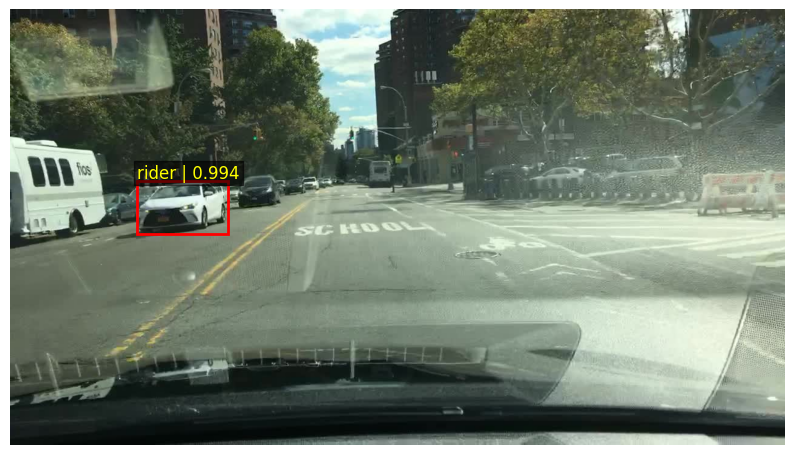


---- Image 700: /Users/ragaai_user/Desktop/Dataset/bdd_val_1k/images/bd57e60e-d36607eb.jpg ----



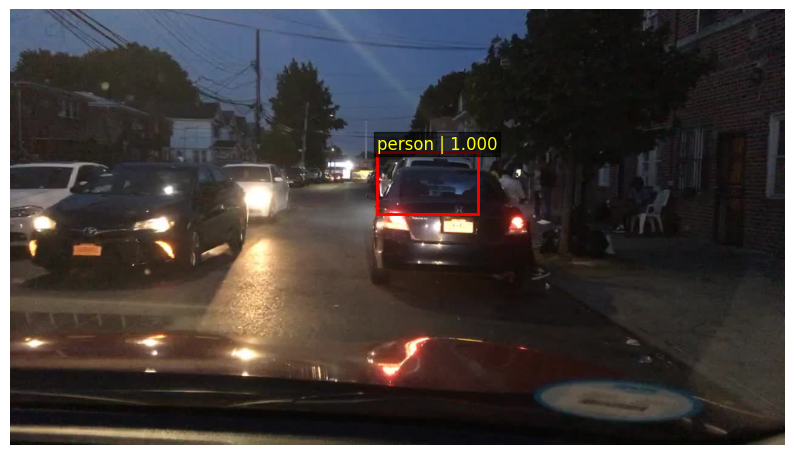


---- Image 576: /Users/ragaai_user/Desktop/Dataset/bdd_val_1k/images/c77e41a3-1f322b36.jpg ----



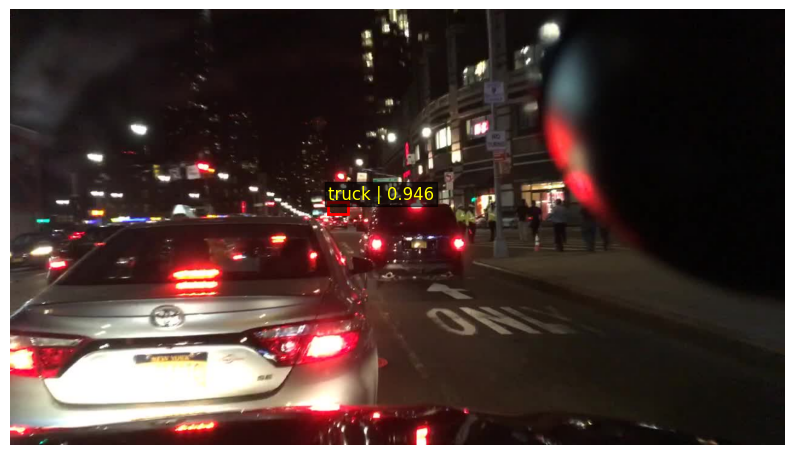


---- Image 695: /Users/ragaai_user/Desktop/Dataset/bdd_val_1k/images/c07733d0-aebb8786.jpg ----



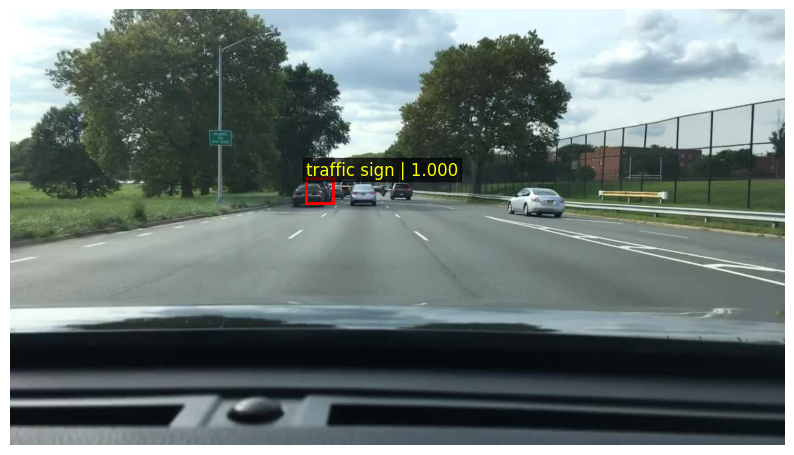


---- Image 237: /Users/ragaai_user/Desktop/Dataset/bdd_val_1k/images/b953a340-d936cbba.jpg ----



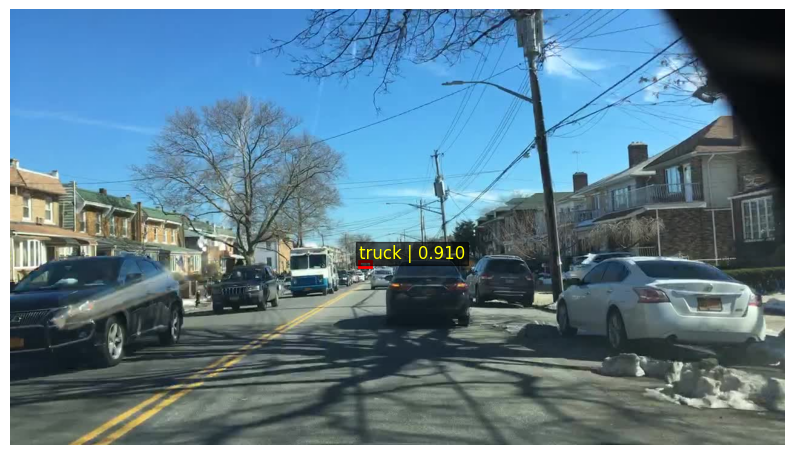

In [61]:
import numpy as np

idxs = np.random.choice(high_error_indices, size=5, replace=False)

for idx in idxs:
    row = df.iloc[idx]

    image_path = row["LocalPath"]
    annotation_json = row["AnnotationsV1"]
    mistake_scores = ast.literal_eval(row["MistakeScore"])

    print(f"\n---- Image {idx}: {image_path} ----\n") 
    plot_high_error_bboxes(image_path, annotation_json, mistake_scores, threshold=0.9)

In [80]:
import json
import ast

def get_swapped_labels(clean_ann, noisy_ann):
    """Return list of IDs where label was swapped."""
    
    swapped = []

    clean_dict = {str(a["Id"]): a["ClassName"] for a in clean_ann["annotations"]}
    noisy_dict = {str(a["Id"]): a["ClassName"] for a in noisy_ann["annotations"]}

    for obj_id in clean_dict:
        if clean_dict[obj_id] != noisy_dict[obj_id]:   # label changed
            swapped.append(obj_id)

    return swapped


def evaluate_swaps_detected(df, threshold=0.5):
    total_swapped = 0
    detected_swapped = 0

    for _, row in df.iterrows():

        # Load annotations
        clean_ann = json.loads(row["AnnotationsV1"])
        noisy_ann = json.loads(row["AnnotationsV1_Noisy"])

        # Load mistake score for noisy annotations
        mistake_scores = ast.literal_eval(row["MistakeScore_Noisy"])

        # Find swapped labels
        swapped_ids = get_swapped_labels(clean_ann, noisy_ann)

        # Count totals
        total_swapped += len(swapped_ids)

        # Find detected ones
        for obj_id in swapped_ids:
            if mistake_scores.get(obj_id, 0) > threshold:
                detected_swapped += 1

    return total_swapped, detected_swapped


import json
import ast

def get_swapped_ids(clean_ann, noisy_ann):
    """Return list of object IDs where ClassName changed."""
    
    clean = {str(a["Id"]): a["ClassName"] for a in clean_ann["annotations"]}
    noisy = {str(a["Id"]): a["ClassName"] for a in noisy_ann["annotations"]}

    swapped = []
    for obj_id in clean:
        if clean[obj_id] != noisy[obj_id]:
            swapped.append(obj_id)

    return swapped


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_swapped_confusion_matrix(y_true, y_pred, title="Confusion Matrix (Swapped Label Detection)"):
    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=["Correct", "Swapped"]
    )
    disp.plot(ax=ax, cmap="Blues", colorbar=False)
    plt.title(title)
    plt.show()

In [63]:
total_swapped, detected_swapped = evaluate_swaps_detected(df, threshold=0.5)

print("Total Swapped Labels:", total_swapped)
print("Detected (MistakeScore > 0.5):", detected_swapped)

print("Detection Accuracy:", detected_swapped / total_swapped if total_swapped else 0)


Total Swapped Labels: 1814
Detected (MistakeScore > 0.5): 859
Detection Accuracy: 0.4735391400220507


In [65]:
from tqdm import tqdm

y_true = []   # ground-truth swapped labels
y_score = []  # mistake scores
y_pred  = []  # predicted swapped labels

THRESHOLD = 0.5  # you can tune this

for _, row in tqdm(df.iterrows(), total=len(df)):

    clean_ann = json.loads(row["AnnotationsV1"])
    noisy_ann = json.loads(row["AnnotationsV1_Noisy"])
    mistake_scores = ast.literal_eval(row["MistakeScore_Noisy"])

    swapped_ids = set(get_swapped_ids(clean_ann, noisy_ann))

    for ann in noisy_ann["annotations"]:
        obj_id = str(ann["Id"])
        score = mistake_scores.get(obj_id, 0)

        # ground truth
        y_true.append(1 if obj_id in swapped_ids else 0)

        # score
        y_score.append(score)

        # predicted
        y_pred.append(1 if score > THRESHOLD else 0)


100%|███████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7385.09it/s]


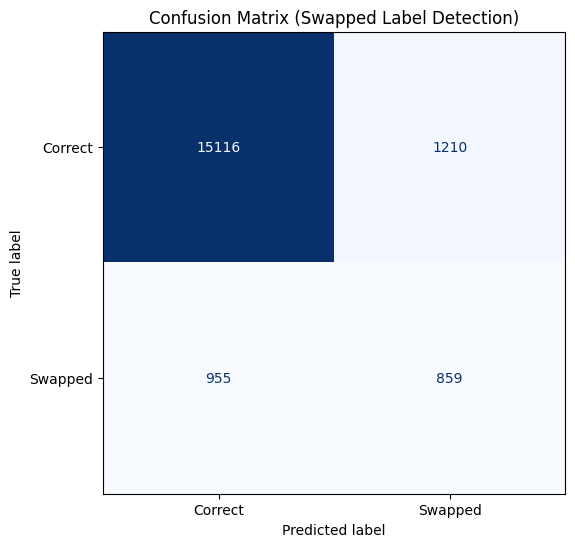

In [81]:
# Example usage:
plot_swapped_confusion_matrix(y_true, y_pred)

In [82]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true, y_pred)
recall    = recall_score(y_true, y_pred)
f1        = f1_score(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.4151764137264379
Recall: 0.4735391400220507
F1 Score: 0.4424414112799382


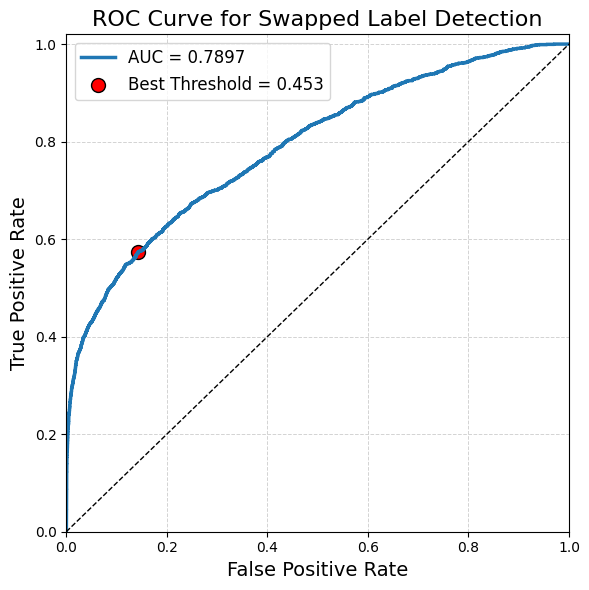

In [85]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Compute ROC
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

# Compute Youden's J statistic to find the optimal point
j_scores = tpr - fpr
j_best_idx = np.argmax(j_scores)
fpr_opt, tpr_opt = fpr[j_best_idx], tpr[j_best_idx]

# --- Plot ---
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, linewidth=2.5, label=f"AUC = {roc_auc:.4f}")

# Optimal threshold marker
plt.scatter(fpr_opt, tpr_opt, s=100, edgecolor="black", facecolor="red",
            label=f"Best Threshold = {thresholds[j_best_idx]:.3f}")

plt.plot([0, 1], [0, 1], "k--", linewidth=1)

plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve for Swapped Label Detection", fontsize=16)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.02])

plt.grid(color="lightgray", linestyle="--", linewidth=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
